In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Define the diffusion model simulation
def simulate_diffusion(v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10., rng=None):
    """
    Simulates a single trial of the drift-diffusion process.
    """
    y = beta * a  # Initial position
    num_steps = tau
    const = scale * np.sqrt(dt)
    
    if rng is None:
        rng = np.random.default_rng()
    
    while (0 <= y <= a) and num_steps <= max_time:
        y += v * dt + const * rng.normal()
        num_steps += dt
    
    return round(num_steps, 4), 1 if y >= a else 0

In [3]:
# Function to simulate multiple trials
def simulate_diffusion_n(num_sims, v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10., rng=None):
    data = np.zeros((num_sims, 2))
    if rng is None:
        rng = np.random.default_rng()
    
    for n in range(num_sims):
        data[n, :] = simulate_diffusion(v, a, beta, tau, dt, scale, max_time, rng)
    
    return data

In [4]:
# Set up parameter range
drift_rates = np.linspace(0.5, 1.5, 25)  # 25 values between 0.5 and 1.5

In [5]:
# Fixed parameters
num_sims = 2000  # Number of trials per condition
fixed_params = {
    'a': 0.8,      # Boundary separation
    'beta': 0.6,   # Starting point
    'tau': 0.4,    # Non-decision time
    'dt': 1e-3,    # Step size
    'scale': 1.0,  # Wiener process scale
    'max_time': 10.,
    'rng': np.random.default_rng(2024)  # Reproducibility
}

In [6]:
# Storage for results
results = []

In [7]:
# Run simulations for different drift rates
for v in drift_rates:
    data = simulate_diffusion_n(num_sims, v, **fixed_params)
    mean_rt_upper = np.mean(data[:, 0][data[:, 1] == 1])  # Mean RT for upper boundary
    mean_rt_lower = np.mean(data[:, 0][data[:, 1] == 0])  # Mean RT for lower boundary
    results.append([v, mean_rt_upper, mean_rt_lower])

In [8]:
# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Drift Rate (v)", "Mean RT Upper", "Mean RT Lower"])

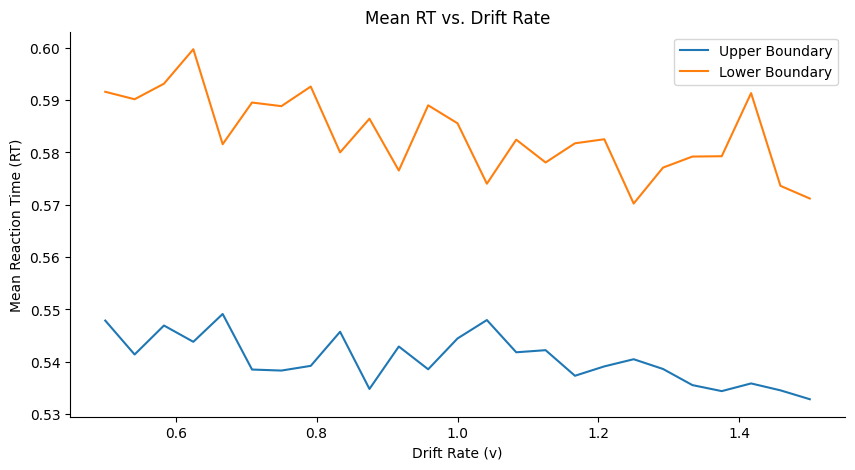

In [9]:
# Plot results
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_results["Drift Rate (v)"], y=df_results["Mean RT Upper"], label="Upper Boundary")
sns.lineplot(x=df_results["Drift Rate (v)"], y=df_results["Mean RT Lower"], label="Lower Boundary")
plt.xlabel("Drift Rate (v)")
plt.ylabel("Mean Reaction Time (RT)")
plt.title("Mean RT vs. Drift Rate")
plt.legend()
sns.despine()
plt.show()

In [10]:
# Display the results
df_results

,Drift Rate (v),Mean RT Upper,Mean RT Lower
0,0.500000,0.547868,0.591602
1,0.541667,0.541381,0.590175
2,0.583333,0.546920,0.593148
3,0.625000,0.543808,0.599737
4,0.666667,0.549125,0.581582
5,0.708333,0.538505,0.589547
6,0.750000,0.538310,0.588854
7,0.791667,0.539210,0.592598
8,0.833333,0.545727,0.580023
9,0.875000,0.534796,0.586451
